## Draw by hand

In [4]:
import pyscreenshot as ImageGrab
import time
images_folder="captured_images/0/"
  
for i in range(0,100):
   time.sleep(8)
   im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

KeyboardInterrupt: 

In [ ]:
import pyscreenshot as ImageGrab
import time
images_folder="captured_images/0/"
  
for i in range(0,100):
   time.sleep(8)
   im = ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

## Generate dataset

In [29]:
import cv2
import glob
import csv
import numpy as np

# Generate dataset and save to CSV
header = ["label"] + ["pixel" + str(i) for i in range(28 * 28)]

with open("dataset.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range(10):
    # Get list of PNG images for the current label
    dirList = glob.glob(f"./captured_images_final/{label}/*.png")
    
    for img_path in dirList:
        # Read the image, including alpha channel
        im = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        
        # Handle transparency: Replace transparent background with white
        if im.shape[2] == 4:  # Check if image has alpha channel
            alpha_channel = im[:, :, 3]
            rgb_channels = im[:, :, :3]
            # Create a white background
            white_background = np.ones_like(rgb_channels, dtype=np.uint8) * 255
            # Blend RGB with white background where alpha is transparent
            mask = (alpha_channel == 0)
            im = rgb_channels.copy()
            im[mask] = white_background[mask]
        else:
            im = im[:, :, :3]  # If no alpha channel, use RGB as is
        
        # Convert to grayscale
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        
        # Resize to 28x28
        im_resized = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
        
        # Convert black to `1` and white to `0`
        data = [label]
        for pixel in im_resized.flatten():
            data.append(1 if pixel < 128 else 0)
        
        # Write data to CSV
        with open("dataset.csv", "a") as f:
            writer = csv.writer(f)
            writer.writerow(data)


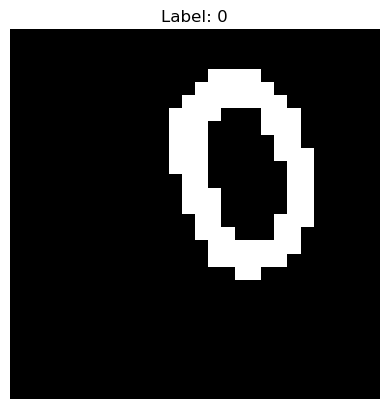

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("dataset.csv")

# Ensure `row_idx` is within the valid range
row_idx = 0  # Change this index as needed
if row_idx >= len(data):
    raise ValueError(f"Invalid row index. The dataset has only {len(data)} rows.")

# Extract label and pixel values
row = data.iloc[row_idx]
label = row["label"]  # Extract the label (first column)
pixels = row[1:].values  # Extract pixel values (remaining columns)

# Reshape pixel values into a 28x28 grid
image = pixels.reshape(28, 28).astype(np.uint8)

# Display the image
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


In [ ]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import joblib

# Load and shuffle the dataset
data = pd.read_csv("dataset.csv")
data = shuffle(data)

# Separate features (X) and labels (Y)
X = data.drop("label", axis=1)
Y = data["label"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the SVM model
classifier = SVC(kernel="linear", random_state=42)
classifier.fit(train_x, train_y)

# Save the trained model
joblib.dump(classifier, "digit_recognizer.pkl")

# Evaluate the model on the test set
predictions = classifier.predict(test_x)
accuracy = metrics.accuracy_score(test_y, predictions)
print(f"Model accuracy: {accuracy * 100:.2f}%")
